# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from model_def import model

# Load Dataset

In [3]:
df = pd.read_csv("../OSBS_datasets/Cleaned_data/disease_prediction_dataset_V4.csv")
print(df.columns)

Index(['datetime', 'soilCO2concentrationMean', 'soilTempMean', 'VSWCMean',
       'VSICMean', 'windSpeedMean', 'windDirMean', 'RHMean', 'tempRHMean',
       'dewTempMean', 'soilCO2concentrationMinimum', 'soilTempMinimum',
       'VSWCMinimum', 'VSICMinimum', 'windSpeedMinimum', 'RHMinimum',
       'tempRHMinimum', 'dewTempMinimum', 'soilCO2concentrationMaximum',
       'soilTempMaximum', 'VSWCMaximum', 'VSICMaximum', 'windSpeedMaximum',
       'RHMaximum', 'tempRHMaximum', 'dewTempMaximum',
       'soilCO2concentrationVariance', 'soilTempVariance', 'VSWCVariance',
       'VSICVariance', 'windSpeedVariance', 'windDirVariance', 'RHVariance',
       'tempRHVariance', 'dewTempVariance', 'TFPrecipBulk', 'wind_sin',
       'wind_cos', 'TFPrecip_flag', 'VPD', 'soilTempMean_lag1h',
       'soilTempMean_lag2h', 'VSWCMean_lag1h', 'VSWCMean_lag2h',
       'soilCO2concentrationMean_lag1h', 'soilCO2concentrationMean_lag2h',
       'VPD_lag1h', 'VPD_lag2h', 'risk_score', 'risk_cluster_kmeans',
     

# Features and Target Selection

In [4]:

features= [col for col in df.columns 
              if all(x not in col for x in ['datetime' ,'Variance' ,'risk_score', 'risk_cluster_kmeans',
       'risk_label', 'risk_label_numeric', 'risk_score_smooth', 'risk_color' , 'TFPrecipBulk' ,'windDirMean'])]

X = df[features]
y = df["risk_label_numeric"]

# Train Test Split

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Training ,Testing, Evaluating and saving the Trained Models

In [8]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

def train_and_evaluate(models, X_train, y_train, X_test, y_test , save_dir="../src/Trained_Models"):
    results = {}
    for name, model in models.items():
        print(f"\n===== {name} =====")
        
        # Train
        model.fit(X_train, y_train)
        
        # Predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Accuracy
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        
        print(f"Training Accuracy : {train_acc:.4f}")
        print(f"Testing Accuracy  : {test_acc:.4f}")
        
        # Save results
        results[name] = {
            "train_accuracy": train_acc,
            "test_accuracy": test_acc
        }
        
        
        # Save model with pickle
        model_path = os.path.join(save_dir, f"{name}.pkl")
        with open(model_path, "wb") as f:
            pickle.dump(model, f)
        print(f"Model saved at {model_path}")
        
        
        # Plot confusion matrices
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f"Confusion Matrices for {name}", fontsize=14)
        
        ConfusionMatrixDisplay.from_predictions(y_train, train_pred, ax=axes[0], cmap="Blues")
        axes[0].set_title("Training Data")
        
        ConfusionMatrixDisplay.from_predictions(y_test, test_pred, ax=axes[1], cmap="Blues")
        axes[1].set_title("Testing Data")
        
        plt.tight_layout()
        plt.show()
    
    return results




===== lr =====


c:\Users\PMLS\anaconda3\envs\scotland_project\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\PMLS\anaconda3\envs\scotland_project\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9871
Testing Accuracy  : 0.9855
Model saved at ../src/Trained_Models\lr.pkl


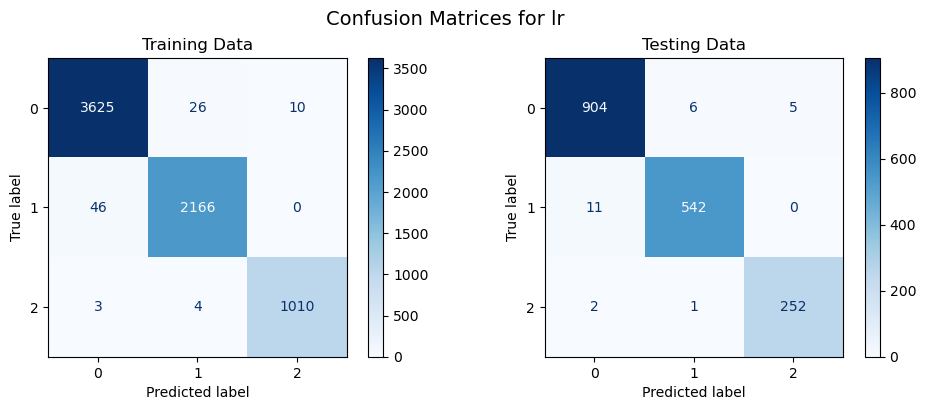


===== rf =====
Training Accuracy : 0.9874
Testing Accuracy  : 0.9872
Model saved at ../src/Trained_Models\rf.pkl


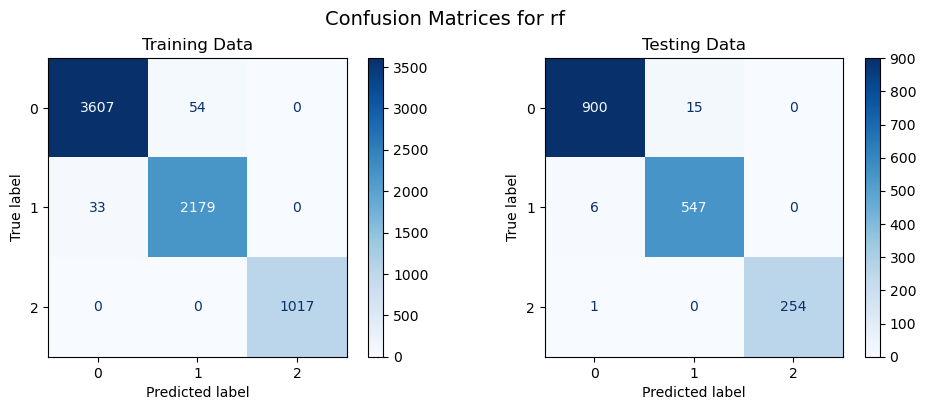


===== xgb =====
Training Accuracy : 0.9884
Testing Accuracy  : 0.9867
Model saved at ../src/Trained_Models\xgb.pkl


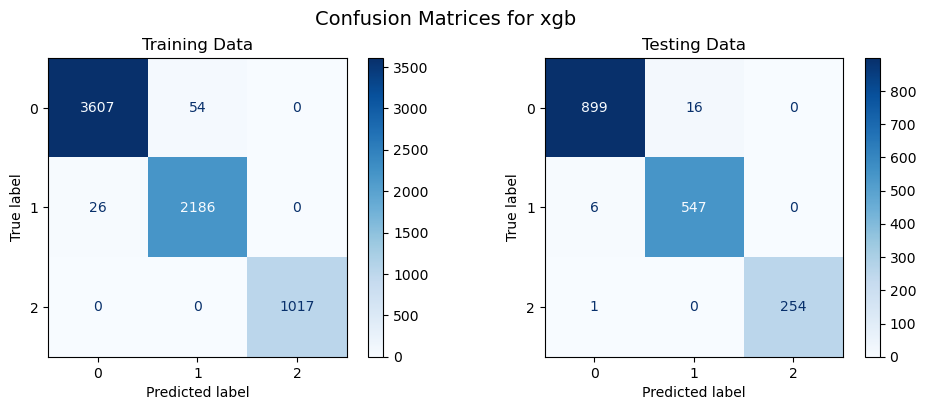

{'lr': {'train_accuracy': 0.9870827285921625, 'test_accuracy': 0.9854904236796286}, 'rf': {'train_accuracy': 0.9873730043541364, 'test_accuracy': 0.9872315728380732}, 'xgb': {'train_accuracy': 0.988388969521045, 'test_accuracy': 0.9866511897852582}}


In [9]:

results = train_and_evaluate(model, X_train, y_train, X_test, y_test)
print(results)